### 04.4 多样本计算
#### 构造函数
初始化学习率、$w,b$赋初始值


In [370]:
from HelperClass.DataReader_1_0 import *
from HelperClass.HyperParameters_1_0 import *
from HelperClass.TrainingHistory_1_0 import *
class NeuralNet_1_0(object):
    def __init__(self, params):
        self.params = params
        self.w = 0
        self.b = 0

#### 前向计算
$$
Z= 
\begin{pmatrix}
    x_1 \\\\ 
    x_2 \\\\ 
    x_3
\end{pmatrix} \cdot w + b 
=\begin{pmatrix}
    x_1 \cdot w + b \\\\ 
    x_2 \cdot w + b \\\\ 
    x_3 \cdot w + b
\end{pmatrix}
=\begin{pmatrix}
    z_1 \\\\ 
    z_2 \\\\ 
    z_3
\end{pmatrix} \tag{2}
$$

In [371]:
def __forwardBatch(self, batch_x):
        #矩阵叉乘
        Z = np.dot(batch_x, self.w) + self.b
        return Z

#### 损失函数
使用多样本的均方差函数计算：$$J(w,b) = \frac{1}{2m}\sum_{i=1}^{m}(z_i - y_i)^2$$
假设有3个样本参与计算
$$
\begin{aligned}
J(w,b) &= \frac{1}{2\times3}[(z_1-y_1)^2+(z_2-y_2)^2+(z_3-y_3)^2] \\\\
&=\frac{1}{2\times3}\sum_{i=1}^3[(z_i-y_i)^2]
\end{aligned} 
\tag{3}
$$

In [372]:
def __checkLoss(self, dataReader):
    X,Y = dataReader.GetWholeTrainSamples()
    m = X.shape[0]
    Z = self.__forwardBatch(X)
    LOSS = (Z - Y)**2
    #矩阵求和
    loss = LOSS.sum()/m/2
    return loss

#### 反向传播
##### 求$w$梯度
$$
\frac{1}{m} X^{\top} \cdot (Z-Y) 
$$
##### 求$b$梯度
$$
\frac{1}{m}(Z-Y)
$$


In [373]:
def __backwardBatch(self, batch_x, batch_y, batch_z):
    m = batch_x.shape[0]
    dZ = batch_z - batch_y
    dB = dZ.sum(axis=0, keepdims=True)/m
    dW = np.dot(batch_x.T, dZ)/m
    return dW, dB

#### 实验

epoch=0
0 0 2.867632602961822
0 2 0.47222604940019475
0 4 0.1237987306803406
0 6 0.03729323127437821
0 8 0.023459704030705356
epoch=1
1 0 0.023452669213339918
1 2 0.02319630861555631
1 4 0.022880110252965456
1 6 0.024487356859279982
1 8 0.023076850384323996
epoch=2
2 0 0.023704632403514992
2 2 0.02278363464159538
2 4 0.02348502007620181
2 6 0.02254456192409872
2 8 0.022363510642938785
epoch=3
3 0 0.02221148304662661
3 2 0.02225378628014902
3 4 0.022713099838066294
3 6 0.0226157999046579
3 8 0.022295353536981387
epoch=4
4 0 0.02222567946907238
4 2 0.022106986475891016
4 4 0.02189685423663492
4 6 0.021828624874240594
4 8 0.021776484986351496
epoch=5
5 0 0.021717359098011816
5 2 0.024039219045692475
5 4 0.02165446365796019
5 6 0.02185170213727956
5 8 0.02173810616681839
epoch=6
6 0 0.02254013116569253
6 2 0.021599081023260375
6 4 0.02196160269993092
6 6 0.02150981997453232
6 8 0.021645980779453615
epoch=7
7 0 0.02154918953576374
7 2 0.022132433767312602
7 4 0.02142129349708934
7 6 0.02152

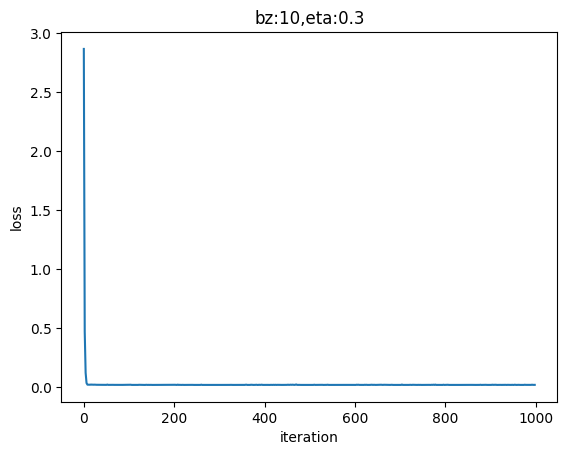

[[1.96791518]] [[2.94407466]]


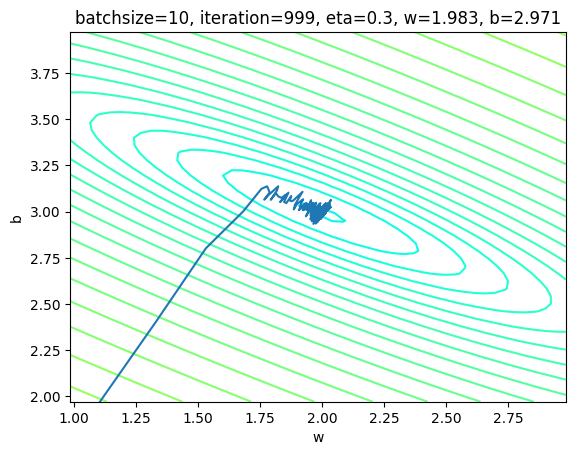

w=1.967915,b=2.944075


In [374]:
from HelperClass.NeuralNet_1_0 import *
from HelperClass.DataReader_1_0 import *
from HelperClass.HyperParameters_1_0 import *
file_name = "ch04.npz"
sdr = DataReader_1_0(file_name)
sdr.ReadData()
params= HyperParameters_1_0(1, 1, eta=0.3, max_epoch=100, batch_size=10, eps = 0.02)
net = NeuralNet_1_0(params)
net.train(sdr)
print("w=%f,b=%f" %(net.w, net.b))

#### 结果可视化

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


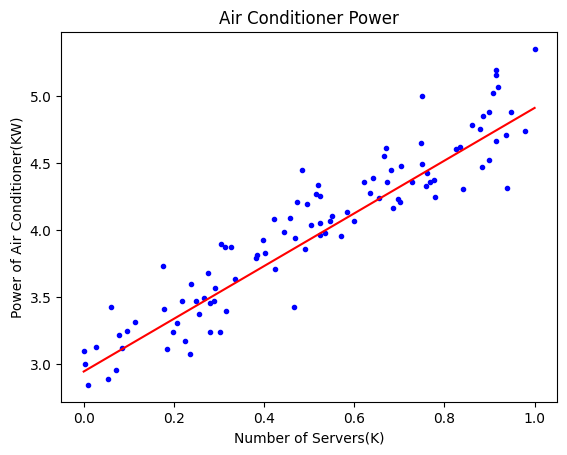

In [375]:
def ShowResult(net, dataReader):
    X,Y = dataReader.GetWholeTrainSamples()
    # draw sample data
    plt.plot(X, Y, "b.")
    # draw predication data
    PX = np.linspace(0,1,10)
    print(PX)
    PZ = (PX*net.w  + net.b).reshape(10)
    plt.plot(PX, PZ, "r")
    plt.title("Air Conditioner Power")
    plt.xlabel("Number of Servers(K)")
    plt.ylabel("Power of Air Conditioner(KW)")
    plt.show()
ShowResult(net, sdr)